# EDA Notebook

## Import Libraries

In [183]:
# Import necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [115]:
# Load clean csv into a DataFrame

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

## Describe Data

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Transform Categorical Values
The following key outlines how the categorical variables can be encoded as integer values:
- Attrition: 'Yes': 1, 'No': 0
- BusinessTravel: 'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently':2
- Department: 'Sales': 1, 'Research & Development': 2, 'Human Resources':3
- EducationField: 1 for 'Life Sciences': 1, 'Medical': 2, 'Marketing':3, 'Technical Degree': 4, 'Human Resources': 5, 'Other': 6
- Gender: 1 for 'Male': 1, 'Female': 2
- JobRole: 'Sales Executive': 1, 'Research Scientist': 2, 'Laboratory Technician':3, 'Manufacturing Director': 4, 'Healthcare Representative': 5, 'Research Director': 6, 'Human Resources':7, 'Manager':8, 'Sales Representative':9
- MaritalStatus: 'Single': 1, 'Married': 2, 'Divorced': 3
- Over18:'Y': 1, 'N': 0
- OverTime: 'Yes': 1, 'No': 0

In [137]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
# df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently':2})
# df['Department'] = df['Department'].map({'Sales': 1, 'Research & Development': 2, 'Human Resources':3})
# df['EducationField'] = df['EducationField'].map({'Life Sciences': 1, 'Medical': 2, 'Marketing':3, 'Technical Degree': 4, 'Human Resources': 5, 'Other': 6})
# df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})
# df['JobRole'] = df['JobRole'].map({'Sales Executive': 1, 'Research Scientist': 2, 'Laboratory Technician':3, 'Manufacturing Director': 4, 'Healthcare Representative': 5, 'Research Director': 6, 'Human Resources':7, 'Manager':8, 'Sales Representative':9})
# df['MaritalStatus'] = df['MaritalStatus'].map({'Single': 1, 'Married': 2, 'Divorced': 3})
# df['Over18'] = df['Over18'].map({'Y': 1, 'N': 0})
# df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

# df.info()

## Describe Data

In [118]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [172]:
# Create a DataFrame for categorical attributes

categ_att = df.select_dtypes(include='object')

In [173]:
# Create a DataFrame for numeric attributes

numer_att = df.select_dtypes(include='int64')

In [174]:
categ_att

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [175]:
numer_att

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,41,4,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,1,2062,4,42,2,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,1,2064,2,87,4,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,1,2065,4,63,2,...,4,80,0,17,3,2,9,6,0,8


## Finding Outliers
Outliers were identified using the 1.5 IQR rule. 

In [179]:
# Find all the outliers in all columns of a dataframe

def id_outliers(df):
    outliers_dict = {}
    
    for column in df.select_dtypes(include=['number']).columns:
        
        # Calculate Q1 and Q3 & interquartile range.
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the outlier boundaries 
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        # Store outliers in dictionary
        outliers_dict[column] = outliers[column]
    
    # Combine all outliers into a single DataFrame
    outliers_df = pd.DataFrame(outliers_dict)

    return outliers_df

outliers = id_outliers(numer_att)
outlier_counts = outliers.count()
print(outlier_counts)

Age                           0
Attrition                   237
DailyRate                     0
DistanceFromHome              0
Education                     0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobSatisfaction               0
MonthlyIncome               114
MonthlyRate                   0
NumCompaniesWorked           52
PercentSalaryHike             0
PerformanceRating           226
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel             85
TotalWorkingYears            63
TrainingTimesLastYear       238
WorkLifeBalance               0
YearsAtCompany              104
YearsInCurrentRole           21
YearsSinceLastPromotion     107
YearsWithCurrManager         14
dtype: int64


## Correlation Analysis
Correlation matrix was used to show the strength and directon of the linear relationship between attrition and the other pairs of variables in the dataset.

In [180]:
corr = numer_att.corr()
corr

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


<Axes: >

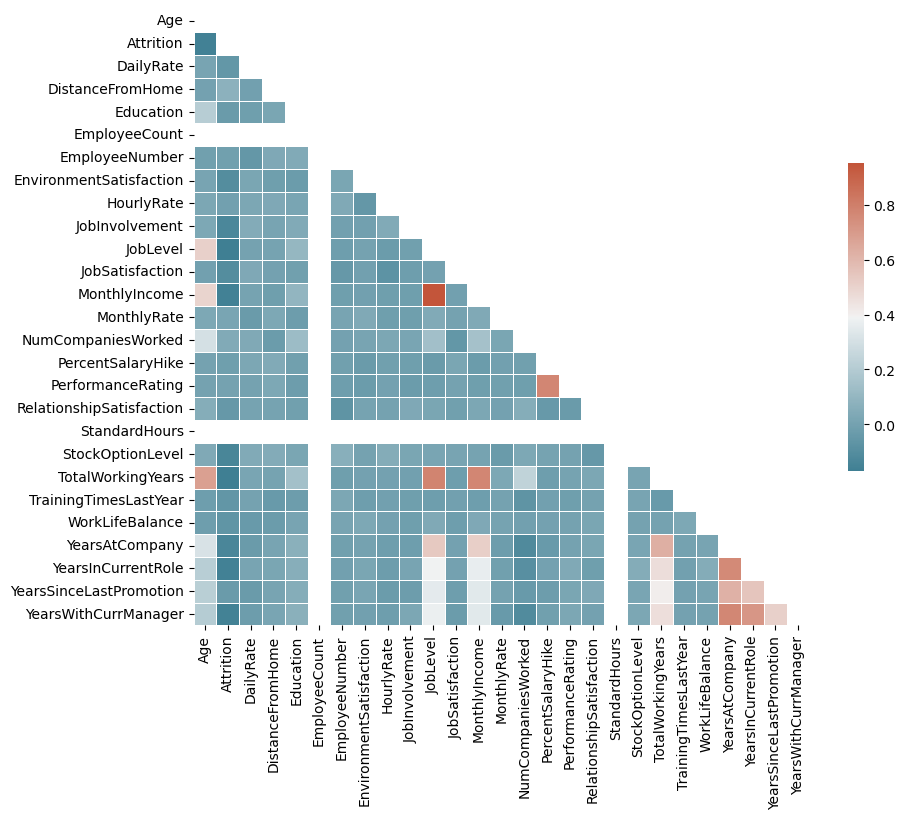

In [190]:
# Create a heatmap of correlation between numeric variables

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=False, cmap=sns.diverging_palette(220, 20, as_cmap=True), square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [191]:
def bar_plot_categorical(df, column, overlay_column):
    
    # Calculate the counts for the main column
    main_counts = df[column].value_counts().sort_index()

    # Calculate the counts for the overlay column grouped by the main column
    overlay_counts = df.groupby([column, overlay_column]).size().unstack(fill_value=0)

    # Plot the bars
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Define color palette
    base_color = sns.color_palette("tab10", n_colors=len(overlay_counts.columns))
    
    # Plot the bars for the overlay counts
    bottom = pd.Series([0] * len(main_counts), index=main_counts.index)
    for idx, overlay_value in enumerate(overlay_counts.columns):
        ax.bar(main_counts.index, overlay_counts[overlay_value], bottom=bottom, 
               color=base_color[idx], label=overlay_value)
        bottom += overlay_counts[overlay_value]

    # Add the Attrition counts as text on top of each bar
    for idx, overlay_value in enumerate(overlay_counts.columns):
        for i, (cat, count) in enumerate(overlay_counts[overlay_value].items()):
            if count > 0:
                ax.text(i, bottom[cat] - count / 2, str(count), ha='center', va='center', color='white')

    ax.set_xlabel(column)
    ax.set_ylabel('Counts')
    ax.set_title(f'Distribution of IBM Employee {column} Counts and Effect on {overlay_column}')
    ax.legend(title=overlay_column)
    plt.xticks(rotation=45)
    plt.show()

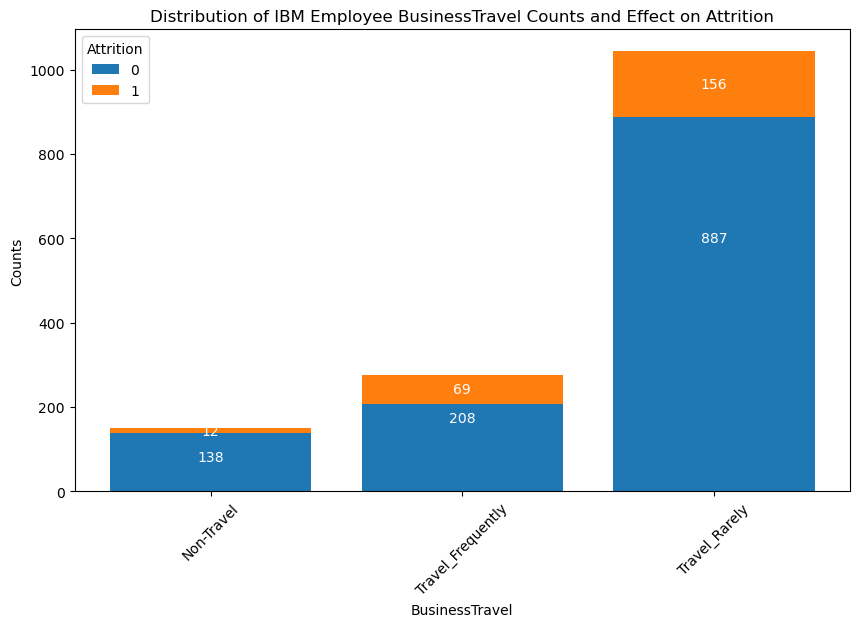

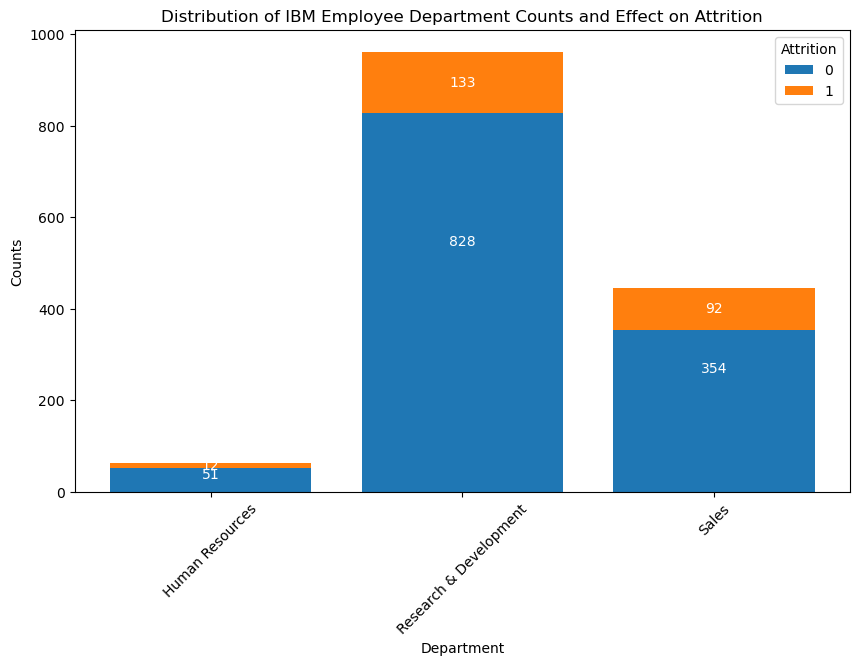

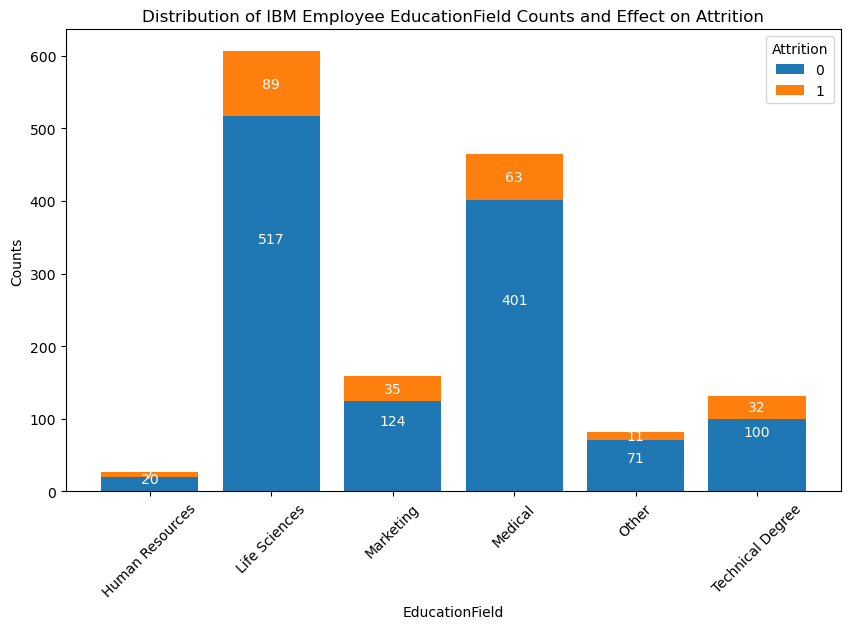

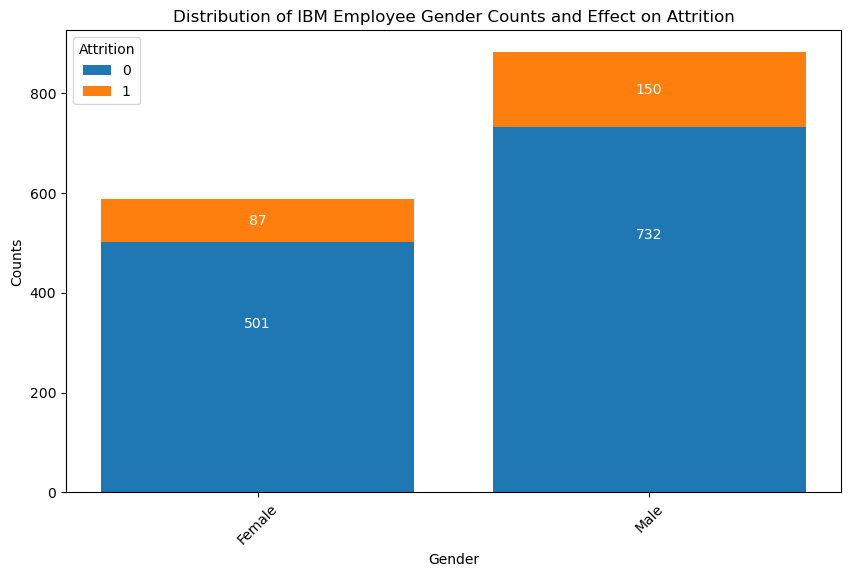

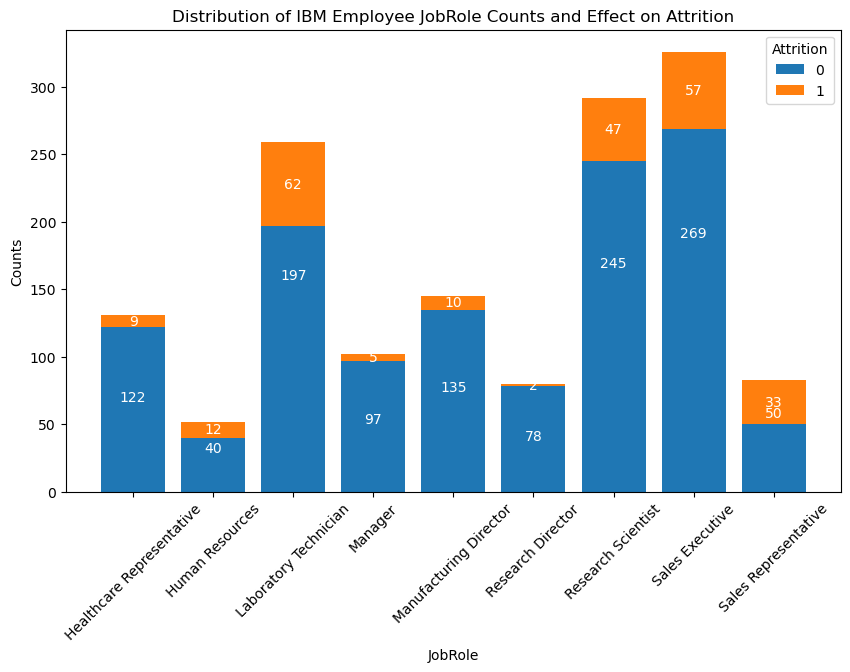

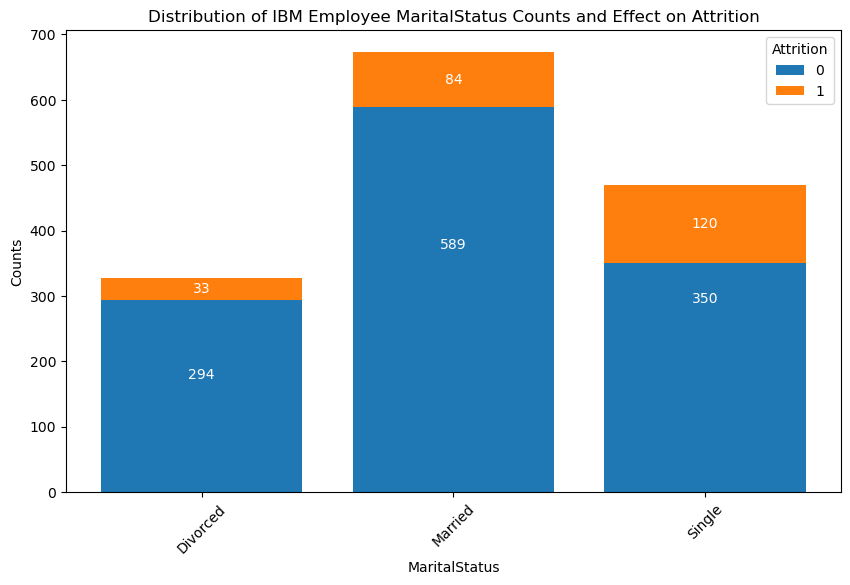

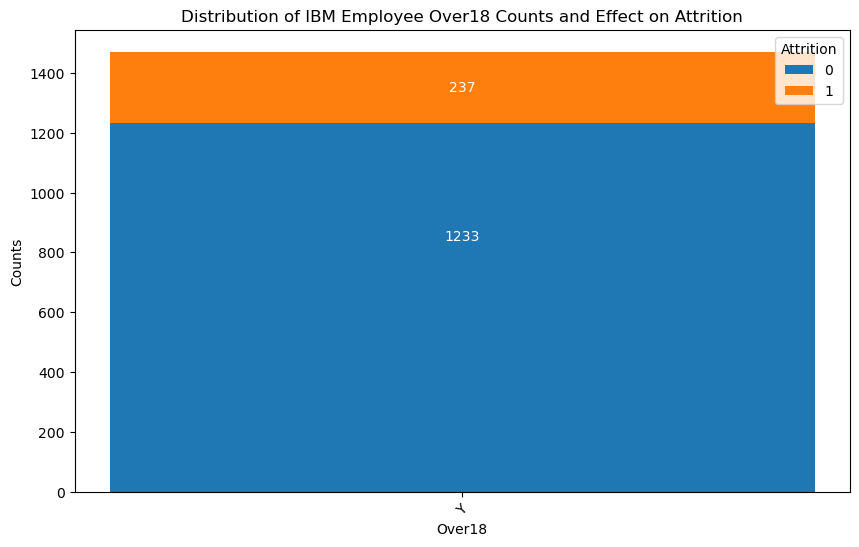

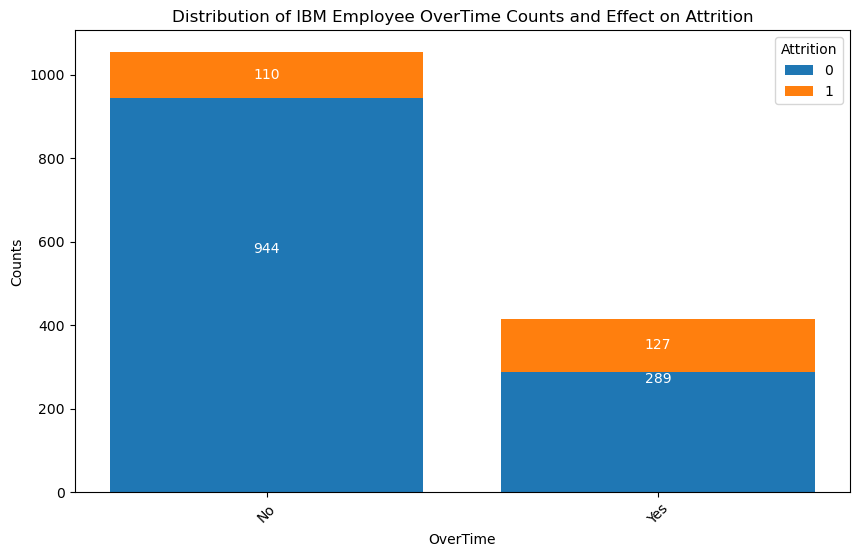

In [198]:
for column in categ_att:
    bar_plot_categorical(df, column, 'Attrition')

In [199]:
def plot_numeric(df, column, hue):
    sns.catplot(data=df, x=column, y='Attrition')

C:\Users\jarro\anaconda3\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


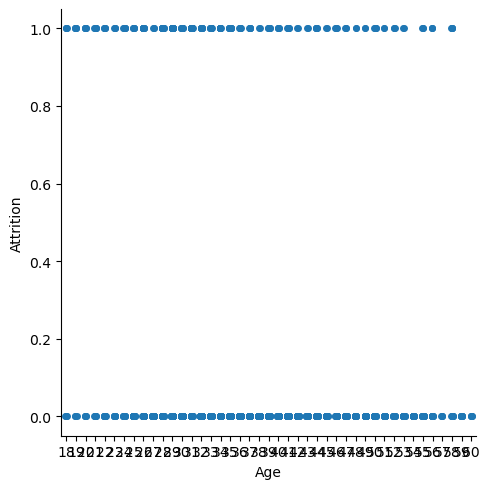

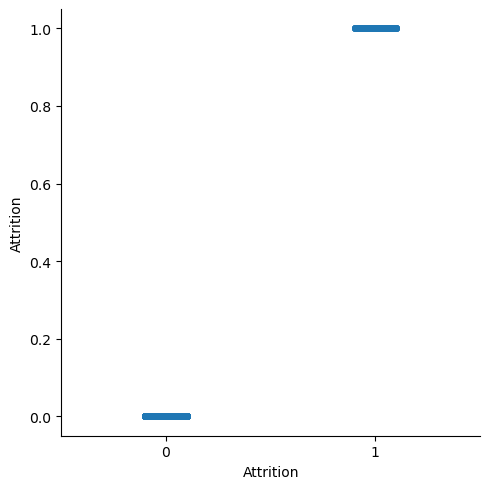

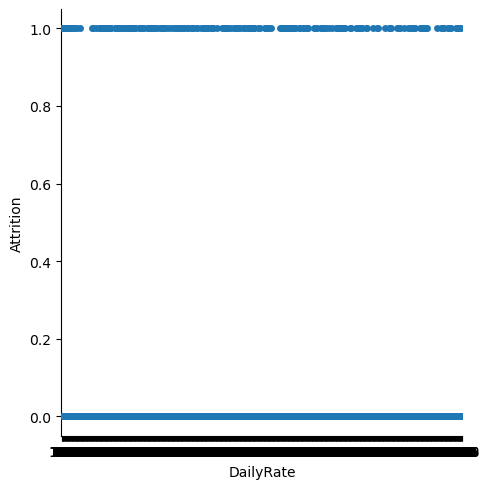

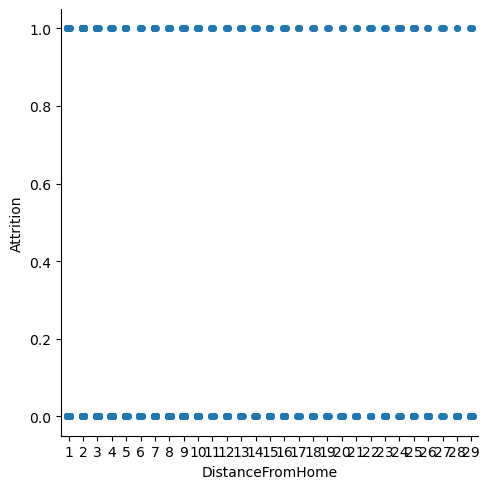

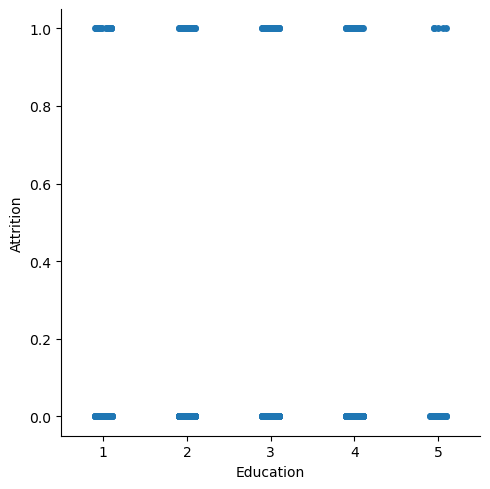

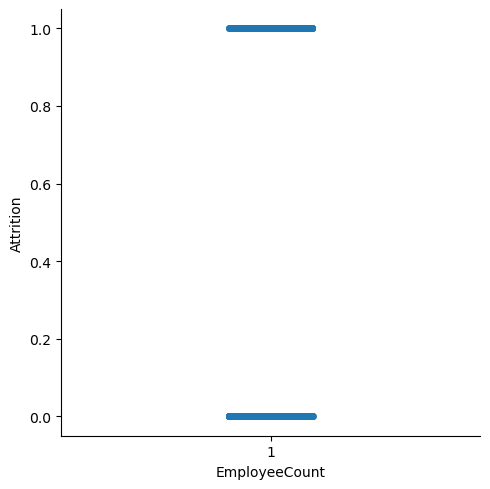

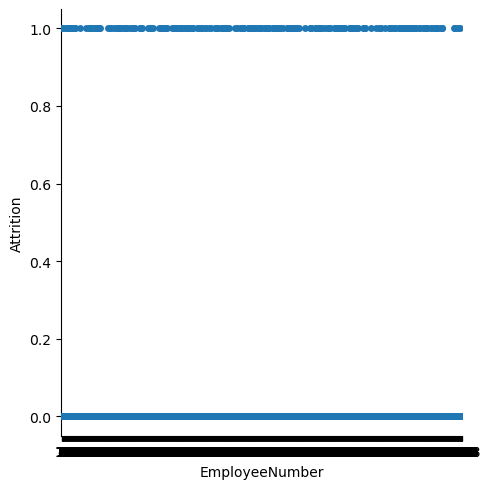

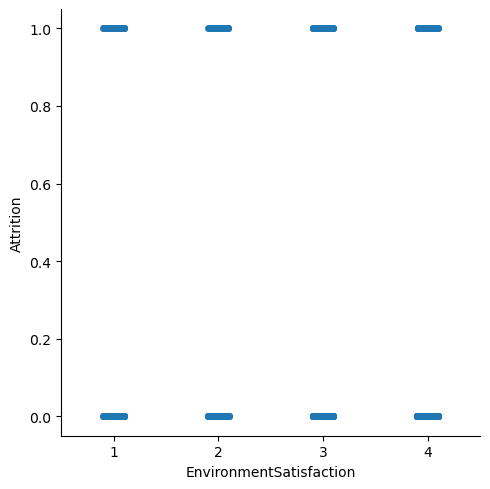

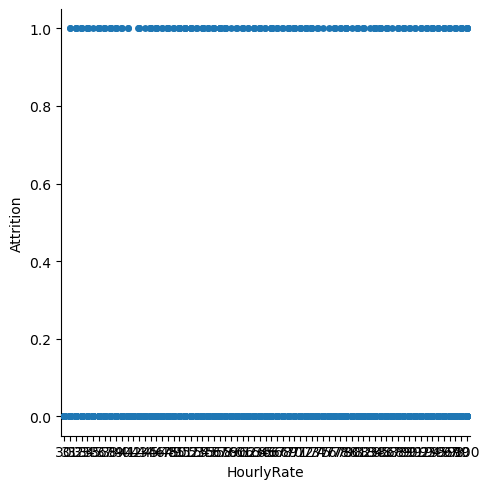

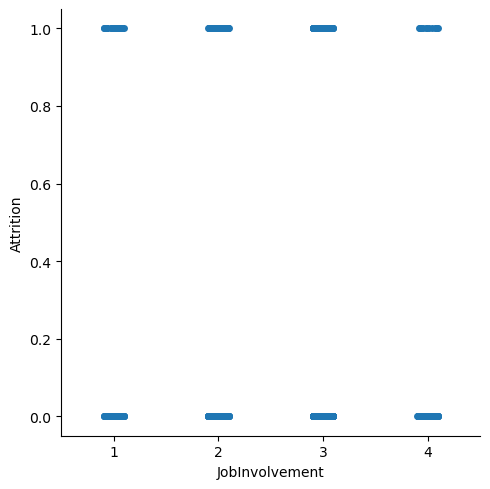

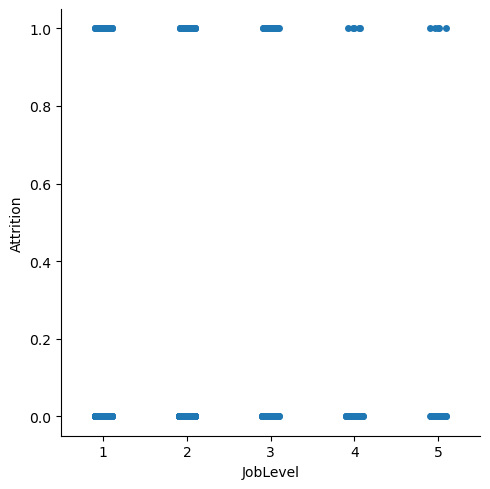

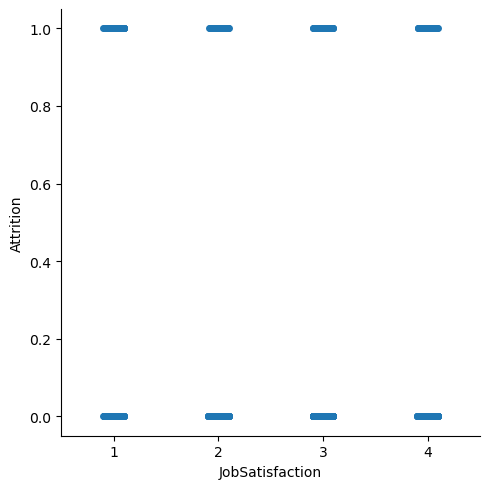

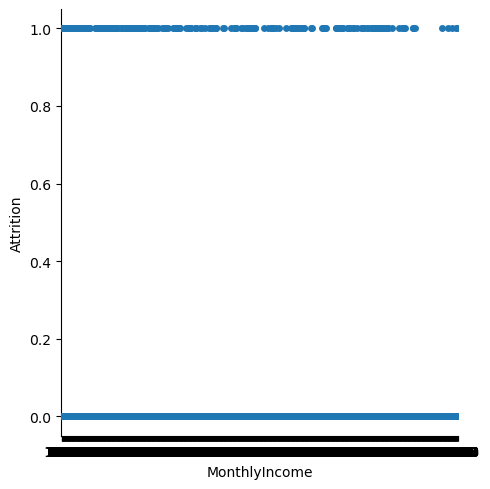

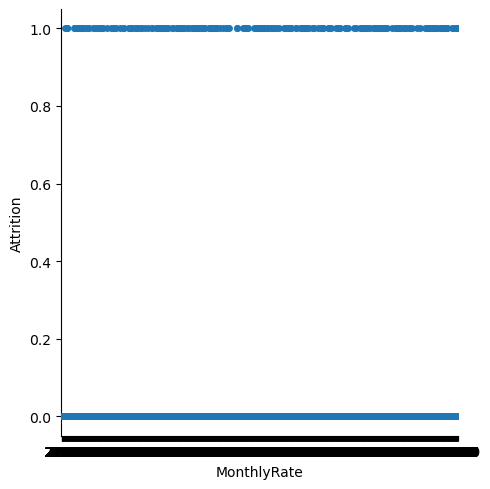

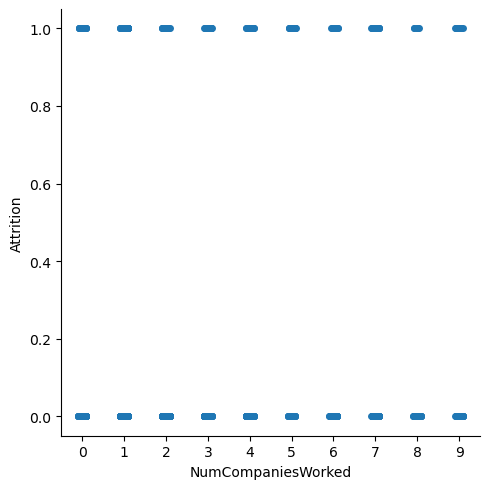

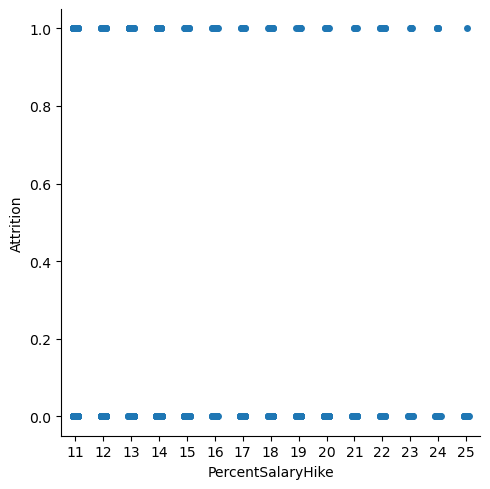

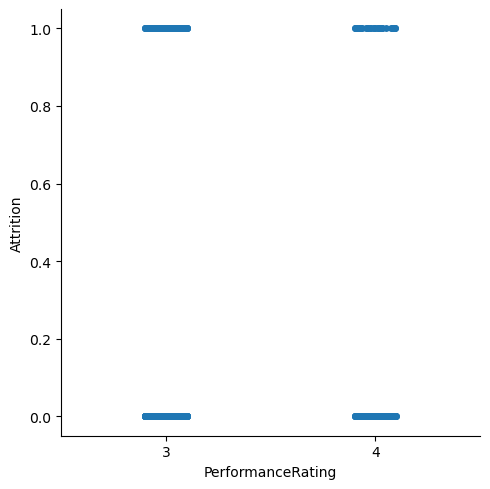

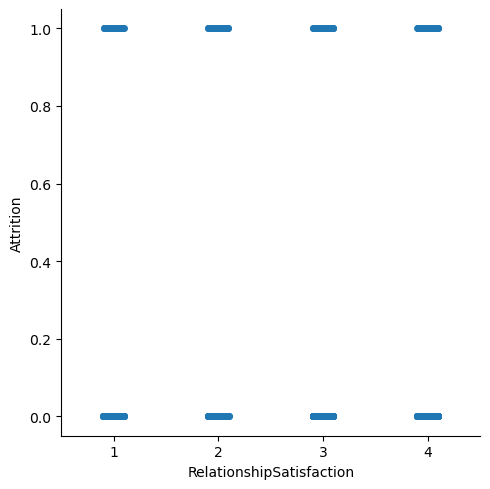

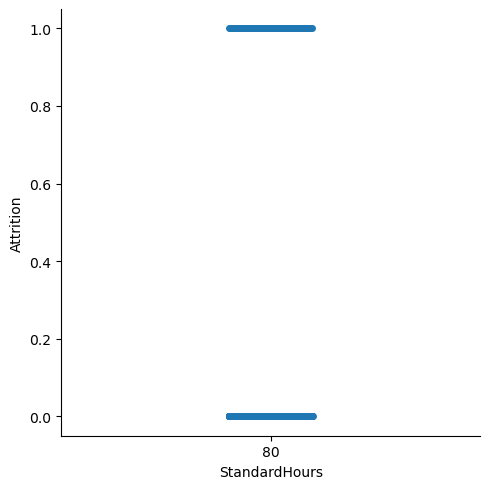

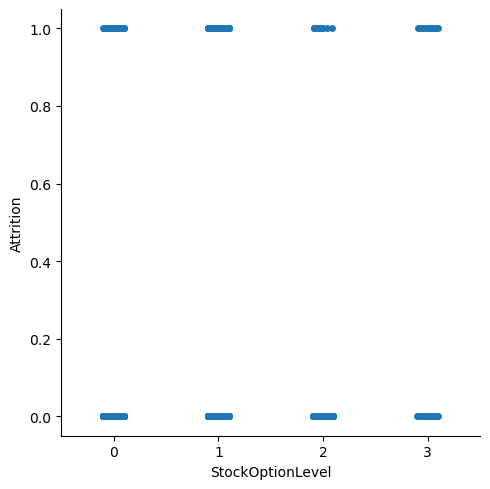

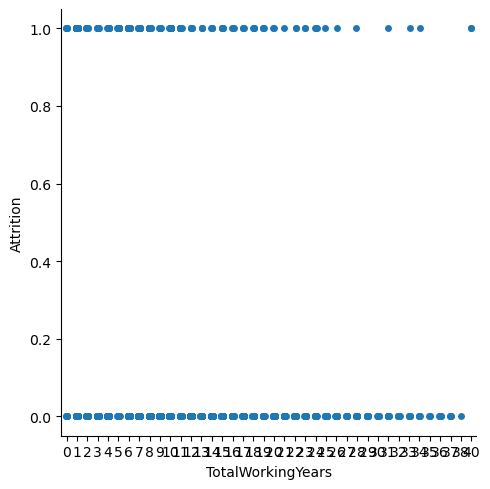

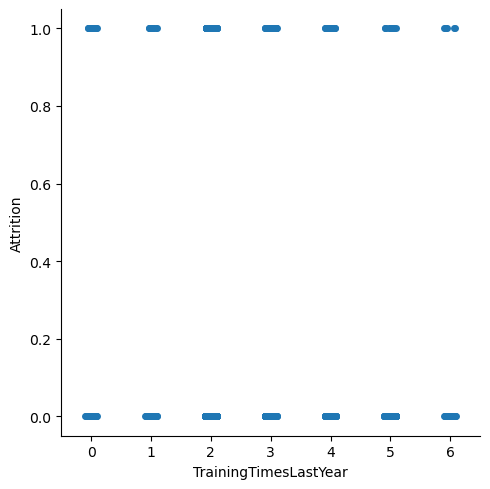

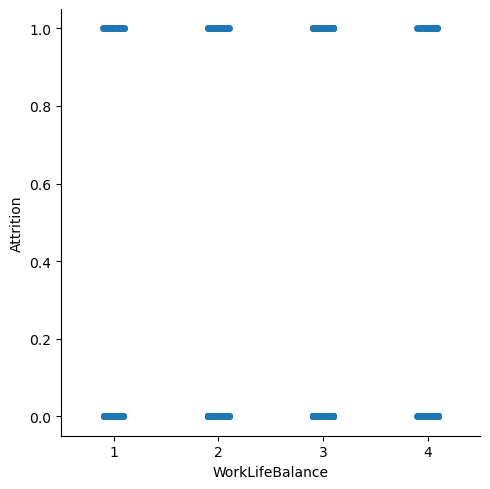

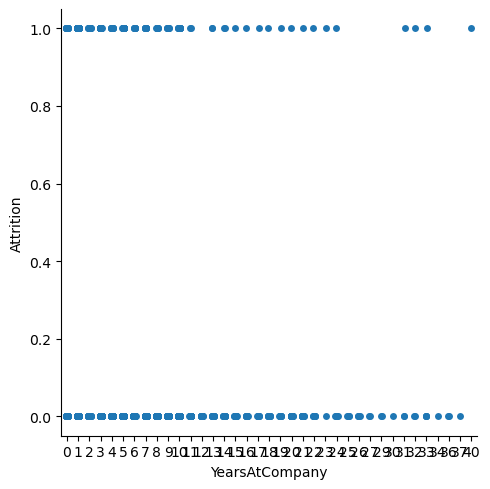

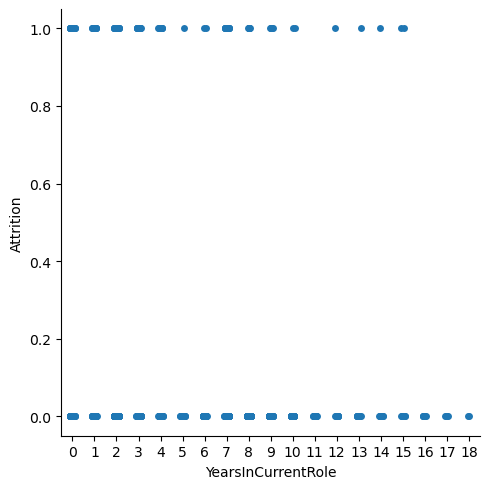

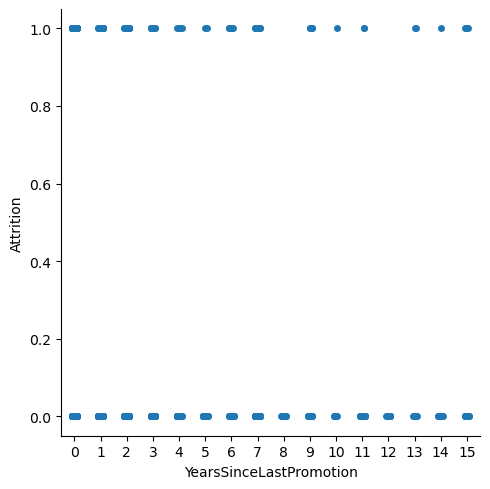

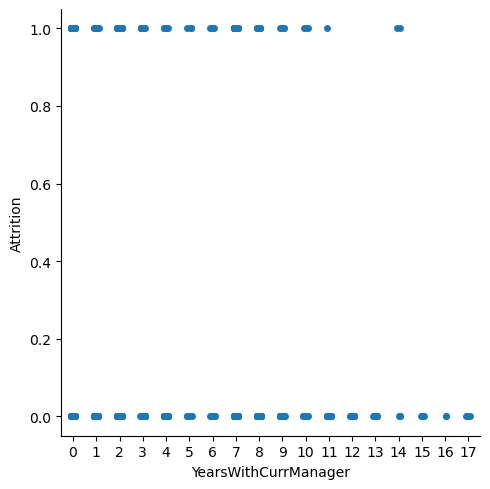

In [200]:
for column in numer_att:
    plot_numeric(df, column, 'Attrition')

<Axes: xlabel='MonthlyIncome', ylabel='Attrition'>

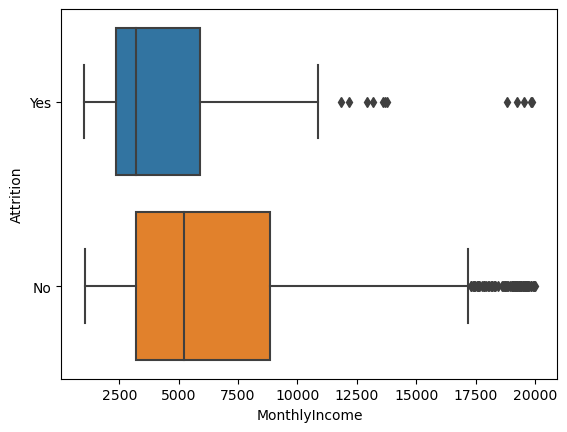

In [134]:
sns.boxplot(data=df, x="MonthlyIncome", y="Attrition")

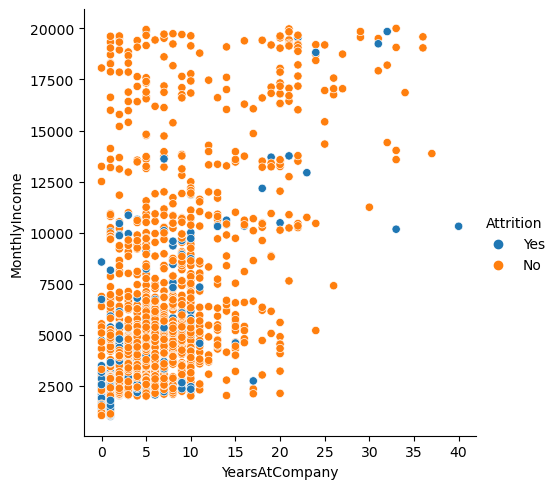

In [132]:
sns.relplot(x='YearsAtCompany', y='MonthlyIncome', hue='Attrition', data=df)